# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_data=pd.merge(mouse_metadata, study_results, how='left',on='Mouse ID')


# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
count_mice=combined_data['Mouse ID'].nunique()
count_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
unique_mice=combined_data.loc[combined_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
unique_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice=combined_data[combined_data.duplicated(['Mouse ID','Timepoint',])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe=combined_data.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_dataframe=clean_dataframe.astype({'Tumor Volume (mm3)':'float'})
clean_dataframe.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
new_count=clean_dataframe['Mouse ID'].nunique()
new_count


249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean=clean_dataframe['Tumor Volume (mm3)'].groupby(clean_dataframe['Drug Regimen']).mean()
mean.astype(float)
median=clean_dataframe['Tumor Volume (mm3)'].groupby(clean_dataframe['Drug Regimen']).median()
median.astype(float)
variance=clean_dataframe['Tumor Volume (mm3)'].groupby(clean_dataframe['Drug Regimen']).var()
variance.astype(float)
stdev=clean_dataframe['Tumor Volume (mm3)'].groupby(clean_dataframe['Drug Regimen']).std()
stdev.astype(float)
sem=clean_dataframe['Tumor Volume (mm3)'].groupby(clean_dataframe['Drug Regimen']).sem()
sem.astype(float)
# Assemble the resulting series into a single summary DataFrame.

combined_statistics=pd.DataFrame({'Mean Tumor Volume':mean,
                                'Median Tumor Volume':median,
                                 'Tumor Volume Variance':variance,
                                 'Tumor Volume Std. Dev.':stdev,
                                 'Tumor Volume Std. Err':sem})

#Displays combined_statistics Dataframe
combined_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_dataframe.groupby(['Drug Regimen']).aggregate({'Tumor Volume (mm3)':['mean','median','var','std','sem']})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

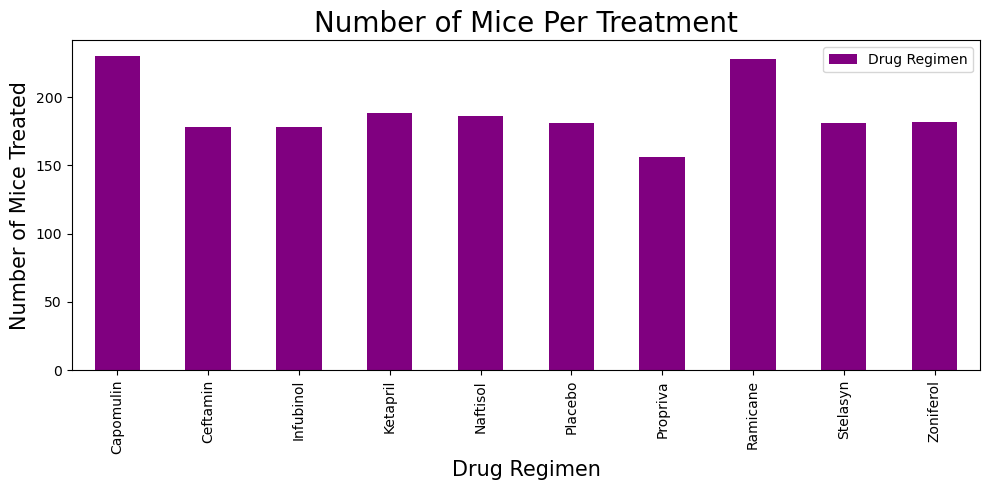

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_drugs=clean_dataframe.groupby(["Drug Regimen"])
drug_number= pd.DataFrame(mice_drugs['Drug Regimen'].count())
drug_graph=drug_number.plot(kind='bar',color="purple",figsize=(10,5))
plt.title('Number of Mice Per Treatment',fontsize=20)
plt.xlabel("Drug Regimen",fontsize=15)
plt.ylabel("Number of Mice Treated",fontsize=15)
plt.tight_layout()
plt.show()

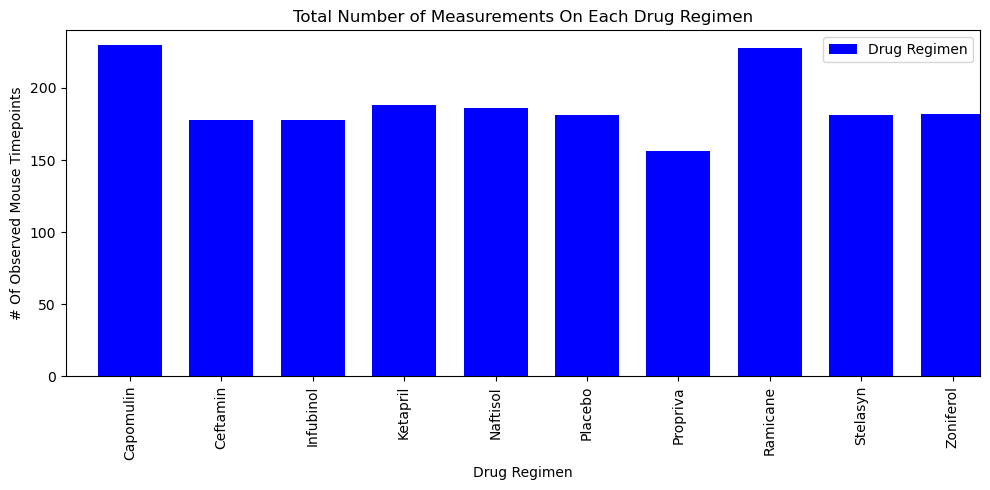

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis=np.arange(len(drug_number))
tick_loc=[value for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis,drug_number['Drug Regimen'],color='b',alpha=1,align='center',width=0.7)
plt.xticks(tick_loc,list(drug_number.index),rotation='vertical')
plt.xlim(-0.7,len(x_axis)-0.7)
plt.ylim(0,max(drug_number['Drug Regimen'])+10)
plt.title("Total Number of Measurements On Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel('# Of Observed Mouse Timepoints')
drug_reg = ['Drug Regimen']
plt.legend(drug_reg,loc="best")
plt.tight_layout()
plt.show()


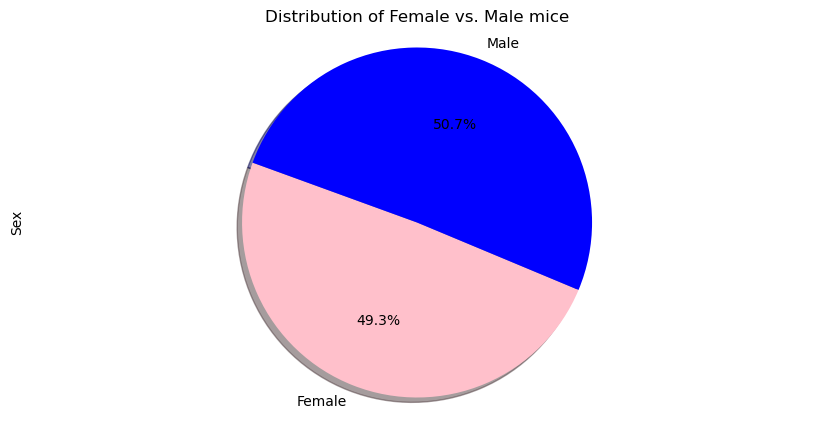

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_plot=clean_dataframe.groupby('Sex')
gender_count=pd.DataFrame(gender_plot['Sex'].count())

gender_count.plot(kind='pie',figsize=(10,5),y='Sex',title='Distribution of Female vs. Male mice'
,startangle=160,autopct='%1.1f%%',shadow=True, colors=['pink','blue'],legend=False)
plt.axis('equal')
plt.show()

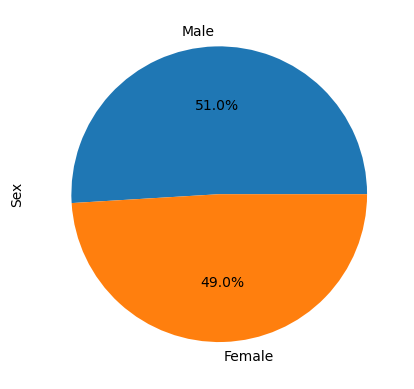

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


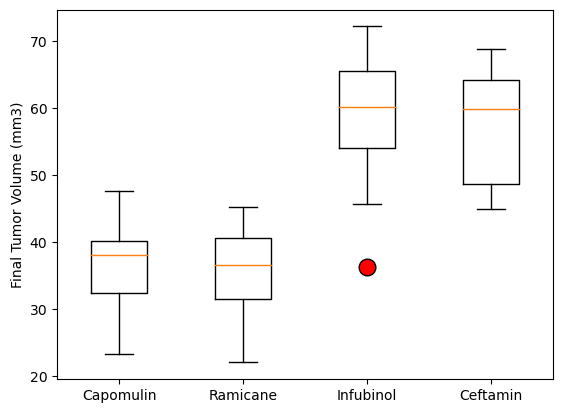

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

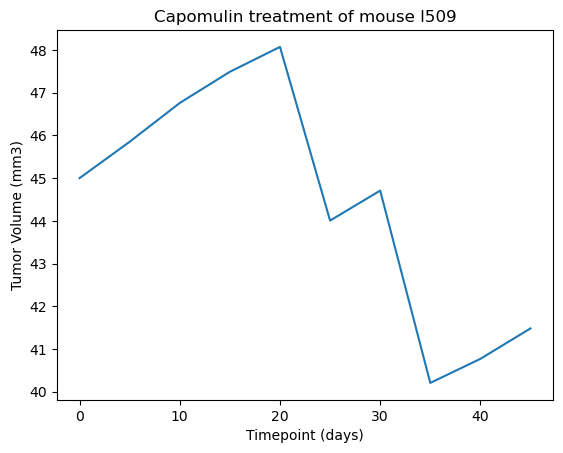

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


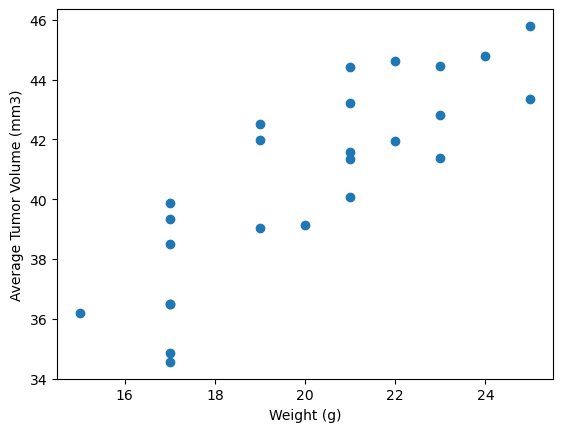

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


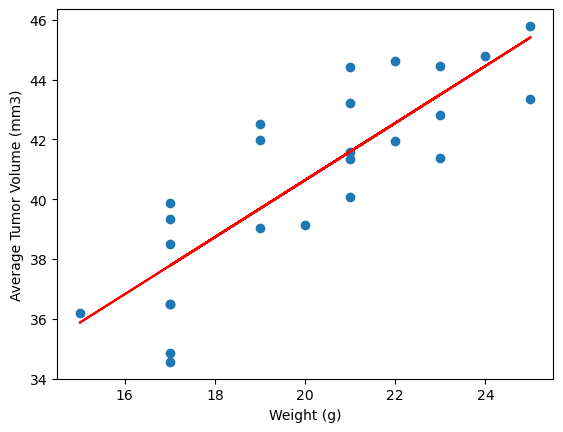

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
